### Data cleaning 2: missing values Assignment

Assignment

In this assignment, you'll be working with the U.S. Education Dataset from Kaggle. The data gives detailed state level information on several facets of the state of education on an annual basis. To learn more about the data and the column descriptions, click the Kaggle link above.

Access this data from the Thinkful database using the following credentials:

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Determine all the variable types and find the fraction of the missing values for each variable.
2. Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variables. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?
3. Now, take into account the time factor. Replicate your second answer but this time fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.
4. This time, fill in the missing values using interpolation (extrapolation).
5. Compare your results for the 2nd, 3rd, and 4th questions. Do you find any meaningful differences?

Submit your work below, and plan on discussing with your mentor. You can also take a look at this example solution.


Data source: 
https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home

In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\katec\Thinkful\data_collections\states_all_extended.csv')

In [ ]:
#need to install 'psycopg2' in order to query database 'useducation'
pip install psycopg2

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

#will need to use engine.dispose() when finished with queries
#engine.dispose()

In [4]:
education_df.head(10)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,394904.0,160299.0,562613.0,221.023429,272.398433,213.480890,266.419687
6,1992_CONNECTICUT,CONNECTICUT,1992,NaN,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,...,38058.0,33691.0,28366.0,304284.0,126917.0,436932.0,226.798480,273.739345,222.417599,264.713904
7,1992_DELAWARE,DELAWARE,1992,NaN,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,...,8272.0,8012.0,6129.0,67495.0,28338.0,96296.0,217.899972,262.868585,206.389052,261.577921
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,NaN,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,...,5832.0,5000.0,3433.0,47009.0,18173.0,70000.0,192.600553,234.924621,178.557612,265.976765
9,1992_FLORIDA,FLORIDA,1992,NaN,11506299.0,788420.0,5683949.0,5033930.0,11305642.0,5166374.0,...,164416.0,142372.0,100835.0,1276685.0,511557.0,1819706.0,213.689751,259.908848,204.882606,262.118986


##### 1. Determine all the variable types and find the fraction of the missing values for each variable.

In [5]:
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

##### Find missing values for each variable type

In [6]:
education_df.isnull().sum()

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL                          263
TOTAL_REVENUE                   212
FEDERAL_REVENUE                 212
STATE_REVENUE                   212
LOCAL_REVENUE                   212
TOTAL_EXPENDITURE               212
INSTRUCTION_EXPENDITURE         212
SUPPORT_SERVICES_EXPENDITURE    212
OTHER_EXPENDITURE               263
CAPITAL_OUTLAY_EXPENDITURE      212
GRADES_PK_G                     173
GRADES_KG_G                     132
GRADES_4_G                      131
GRADES_8_G                      131
GRADES_12_G                     131
GRADES_1_8_G                    131
GRADES_9_12_G                   131
GRADES_ALL_G                    173
AVG_MATH_4_SCORE                956
AVG_MATH_8_SCORE                960
AVG_READING_4_SCORE             959
AVG_READING_8_SCORE             994
dtype: int64

In [7]:
#from stackoverflow
#find missing and zero values (as seen in row 8)
def missing_zero_values_table(education_df):
        zero_val = (education_df == 0.00).astype(int).sum(axis=0)
        mis_val = education_df.isnull().sum()
        mis_val_percent = 100 * education_df.isnull().sum() / len(education_df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = education_df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(education_df.shape[1]) + " columns and " + str(education_df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")

        return mz_table

missing_zero_values_table(education_df)

Your selected dataframe has 25 columns and 1492 Rows.
There are 22 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
AVG_READING_8_SCORE,0,994,66.6,994,66.6,float64
AVG_MATH_8_SCORE,0,960,64.3,960,64.3,float64
AVG_READING_4_SCORE,0,959,64.3,959,64.3,float64
AVG_MATH_4_SCORE,0,956,64.1,956,64.1,float64
OTHER_EXPENDITURE,0,263,17.6,263,17.6,float64
ENROLL,0,263,17.6,263,17.6,float64
INSTRUCTION_EXPENDITURE,0,212,14.2,212,14.2,float64
SUPPORT_SERVICES_EXPENDITURE,0,212,14.2,212,14.2,float64
TOTAL_EXPENDITURE,0,212,14.2,212,14.2,float64
CAPITAL_OUTLAY_EXPENDITURE,0,212,14.2,212,14.2,float64


In [8]:
education_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.229000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.229000e+03,...,1361.000000,1361.000000,1361.00000,1.361000e+03,1.361000e+03,1.319000e+03,536.000000,532.000000,533.000000,498.000000
mean,2004.433646,9.159308e+05,9.092082e+06,7.663723e+05,4.216553e+06,4.109157e+06,9.196681e+06,4.762966e+06,2.680331e+06,4.292046e+05,...,64538.927259,64271.057311,54268.92432,5.192140e+05,2.470714e+05,8.024415e+05,234.768293,278.414711,218.866154,263.661132
std,7.393983,1.065280e+06,1.174519e+07,1.145242e+06,5.543072e+06,5.482971e+06,1.197813e+07,6.293004e+06,3.353349e+06,5.340693e+05,...,80293.387625,78910.545776,67889.27623,6.436384e+05,3.077056e+05,9.707031e+05,10.221511,10.159722,7.769616,6.803725
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,633.000000,437.000000,311.00000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,2.583140e+05,2.186305e+06,1.893540e+05,1.153097e+06,7.158345e+05,2.165404e+06,1.168032e+06,6.357900e+05,1.028310e+05,...,13739.000000,13342.000000,10919.00000,1.106260e+05,5.147100e+04,1.810650e+05,229.694352,272.761598,214.663401,259.533171
50%,2004.000000,6.483130e+05,5.079546e+06,4.033765e+05,2.537074e+06,2.055780e+06,5.234506e+06,2.657452e+06,1.525406e+06,2.715960e+05,...,43272.000000,43339.000000,36735.00000,3.457750e+05,1.642600e+05,5.503420e+05,237.238552,280.618803,220.416034,265.010912
75%,2011.000000,1.014528e+06,1.085985e+07,8.289660e+05,5.080939e+06,4.768680e+06,1.074519e+07,5.568028e+06,3.229651e+06,5.186000e+05,...,75481.000000,76566.000000,67460.00000,6.119050e+05,2.905020e+05,9.282755e+05,241.995486,285.347428,223.999337,268.190121
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.00000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


2. Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variables. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?

The lowest percentage of missing variables is 8.8% in the ENROLLMENT categories. Overall, this seems too high a percentage to simply "toss out" the records entirely, as it would also effect the other categories. Best strategy is to fill in the missing variables. 

Imputation of the mean for the category of each missing variable should be calculated by STATE. For best/most accurate imputation, it would be best to calculate the mean of county of the state, if possible. 

In [9]:
education_df.groupby('STATE').describe()

YEAR                                 \
                                         count         mean       std     min   
STATE                                                                           
ALABAMA                                   26.0  2004.500000  7.648529  1992.0   
ALASKA                                    26.0  2004.500000  7.648529  1992.0   
AMERICAN_SAMOA                            22.0  2003.272727  6.929453  1992.0   
ARIZONA                                   26.0  2004.500000  7.648529  1992.0   
ARKANSAS                                  26.0  2004.500000  7.648529  1992.0   
AS                                         1.0  1998.000000       NaN  1998.0   
BI                                         4.0  2008.500000  7.047458  1998.0   
BIE                                        2.0  2005.500000  0.707107  2005.0   
BUREAU_OF_INDIAN_AFFAIRS                   6.0  2003.166667  5.492419  1999.0   
BUREAU_OF_INDIAN_EDUCATIO                  1.0  2004.000000       NaN  2004.0   
BUREAU_OF_INDIAN_EDUCATION                 2.0  2011.000000  5.656854  2007.0   
CALIFORNIA                                26.0  2004.500000  7.648529  1992.0   
COLORADO                                  26.0  2004.500000  7.648529  1992.0   
COMMONWEALTH_OF_MARIANAS                   3.0  1995.000000  2.645751  1992.0   
CONNECTICUT                               26.0  2004.500000  7.648529  1992.0   
DD                                         4.0  2008.500000  7.047458  1998.0   
DELAWARE                                  26.0  2004.500000  7.648529  1992.0   
DEPARTMENT_OF_DEFENSE                      1.0  2014.000000       NaN  2014.0   
DEPARTMENT_OF_DEFENSE_EDUCATION_ACTIVITY   1.0  2015.000000       NaN  2015.0   
DISTRICT_OF_COLUMBIA                      29.0  2004.965517  7.365376  1992.0   
DOD                                        1.0  1996.000000       NaN  1996.0   
DOD_(OVERSEAS_AND_DOMESTIC_COMBINED)       1.0  2010.000000       NaN  2010.0   
DOD_-_DOMESTIC                             2.0  2008.000000  1.414214  2007.0   
DOD_-_FOREIGN                              1.0  1997.000000       NaN  1997.0   
DOD_-_OVERSEAS                             2.0  2008.000000  1.414214  2007.0   
DOD_DOMESTIC                               8.0  2002.500000  2.449490  1999.0   
DOD_OVERSEAS                               8.0  2002.500000  2.449490  1999.0   
FLORIDA                                   26.0  2004.500000  7.648529  1992.0   
GEORGIA                                   26.0  2004.500000  7.648529  1992.0   
GU                                         1.0  1998.000000       NaN  1998.0   
...                                        ...          ...       ...     ...   
NEVADA                                    26.0  2004.500000  7.648529  1992.0   
NEW_HAMPSHIRE                             26.0  2004.500000  7.648529  1992.0   
NEW_JERSEY                                26.0  2004.500000  7.648529  1992.0   
NEW_MEXICO                                26.0  2004.500000  7.648529  1992.0   
NEW_YORK                                  26.0  2004.500000  7.648529  1992.0   
NORTHERN_MARIANAS                         14.0  2003.000000  5.068758  1993.0   
NORTHERN_MARIANA_ISLANDS                   3.0  2012.000000  1.000000  2011.0   
NORTH_CAROLINA                            26.0  2004.500000  7.648529  1992.0   
NORTH_DAKOTA                              26.0  2004.500000  7.648529  1992.0   
OHIO                                      26.0  2004.500000  7.648529  1992.0   
OKLAHOMA                                  26.0  2004.500000  7.648529  1992.0   
OREGON                                    26.0  2004.500000  7.648529  1992.0   
PENNSYLVANIA                              26.0  2004.500000  7.648529  1992.0   
PR                                         1.0  1998.000000       NaN  1998.0   
PUERTO_RICO                               23.0  2003.739130  7.130073  1992.0   
RHODE_ISLAND                              26.0  2004.500000  7.648529  19

In [10]:
education_df['STATE'].unique()

array(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA',
       'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT_OF_COLUMBIA',
       'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA',
       'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND',
       'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI',
       'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW_HAMPSHIRE',
       'NEW_JERSEY', 'NEW_MEXICO', 'NEW_YORK', 'NORTH_CAROLINA',
       'NORTH_DAKOTA', 'OHIO', 'WYOMING', 'OKLAHOMA', 'OREGON',
       'PENNSYLVANIA', 'RHODE_ISLAND', 'SOUTH_CAROLINA', 'SOUTH_DAKOTA',
       'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON',
       'WEST_VIRGINIA', 'WISCONSIN', 'BUREAU_OF_INDIAN_AFFAIRS',
       'DOD_OVERSEAS', 'DOD_DOMESTIC', 'AMERICAN_SAMOA', 'GUAM',
       'NORTHERN_MARIANAS', 'PUERTO_RICO', 'VIRGIN_ISLANDS', 'BI', 'DD',
       'NORTHERN_MARIANA_ISLANDS', 'DEPARTMENT_OF_DEFENSE',
       'BUREAU_OF_INDIAN_EDUCATION',
       'DEPART

In [11]:
education_df.replace(['BI', 'BIE', 'BUREAU_OF_INDIAN_EDUCATIO', 'BUREAU_OF_INDIAN_EDUCATION'], 
                            'BUREAU_OF_INDIAN_AFFAIRS', inplace = True) 

In [12]:
education_df.replace(['DOD_OVERSEAS', 'DOD_DOMESTIC', 'DD', 'DEPARTMENT_OF_DEFENSE_EDUCATION_ACTIVITY', 'DEPARTMENT_OF_DEFENSE_EDUCATION_ACTIVITY', 'DOD_(OVERSEAS_AND_DOMESTIC_COMBINED)', 'DOD_-_FOREIGN', 'DOD_-_OVERSEAS', 'DOD_-_DOMESTIC', 'DOD'], 
                            'DEPARTMENT_OF_DEFENSE', inplace = True) 

In [13]:
education_df.replace('GU', 'GUAM', inplace = True)

In [14]:
education_df.replace(['NORTHERN_MARIANAS','NORTHERN_MARIANA_ISLANDS', 'MP','COMMONWEALTH_OF_MARIANAS'], 
                            'MARIANAS', inplace = True) 

In [15]:
education_df.replace('AS','AMERICAN_SAMOA', inplace = True) 

In [16]:
education_df.replace('VI', 'U.S._VIRGIN_ISLANDS', inplace = True) 

In [17]:
education_df.replace('PR', 'PUERTO_RICO', inplace = True) 

In [18]:
print(education_df['STATE'].unique())

['ALABAMA' 'ALASKA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO'
 'CONNECTICUT' 'DELAWARE' 'DISTRICT_OF_COLUMBIA' 'FLORIDA' 'GEORGIA'
 'HAWAII' 'IDAHO' 'ILLINOIS' 'INDIANA' 'IOWA' 'KANSAS' 'KENTUCKY'
 'LOUISIANA' 'MAINE' 'MARYLAND' 'MASSACHUSETTS' 'MICHIGAN' 'MINNESOTA'
 'MISSISSIPPI' 'MISSOURI' 'MONTANA' 'NEBRASKA' 'NEVADA' 'NEW_HAMPSHIRE'
 'NEW_JERSEY' 'NEW_MEXICO' 'NEW_YORK' 'NORTH_CAROLINA' 'NORTH_DAKOTA'
 'OHIO' 'WYOMING' 'OKLAHOMA' 'OREGON' 'PENNSYLVANIA' 'RHODE_ISLAND'
 'SOUTH_CAROLINA' 'SOUTH_DAKOTA' 'TENNESSEE' 'TEXAS' 'UTAH' 'VERMONT'
 'VIRGINIA' 'WASHINGTON' 'WEST_VIRGINIA' 'WISCONSIN'
 'BUREAU_OF_INDIAN_AFFAIRS' 'DEPARTMENT_OF_DEFENSE' 'AMERICAN_SAMOA'
 'GUAM' 'MARIANAS' 'PUERTO_RICO' 'VIRGIN_ISLANDS' 'U.S._VIRGIN_ISLANDS']


In [20]:
education_df.groupby('STATE').describe()

YEAR                                           \
                         count         mean        std     min      25%   
STATE                                                                     
ALABAMA                   26.0  2004.500000   7.648529  1992.0  1998.25   
ALASKA                    26.0  2004.500000   7.648529  1992.0  1998.25   
AMERICAN_SAMOA            23.0  2003.043478   6.858825  1992.0  1997.50   
ARIZONA                   26.0  2004.500000   7.648529  1992.0  1998.25   
ARKANSAS                  26.0  2004.500000   7.648529  1992.0  1998.25   
BUREAU_OF_INDIAN_AFFAIRS  15.0  2006.000000   5.732115  1998.0  2001.50   
CALIFORNIA                26.0  2004.500000   7.648529  1992.0  1998.25   
COLORADO                  26.0  2004.500000   7.648529  1992.0  1998.25   
CONNECTICUT               26.0  2004.500000   7.648529  1992.0  1998.25   
DELAWARE                  26.0  2004.500000   7.648529  1992.0  1998.25   
DEPARTMENT_OF_DEFENSE     29.0  2004.758621   5.248504  1996.0  2001.00   
DISTRICT_OF_COLUMBIA      29.0  2004.965517   7.365376  1992.0  1999.00   
FLORIDA                   26.0  2004.500000   7.648529  1992.0  1998.25   
GEORGIA                   26.0  2004.500000   7.648529  1992.0  1998.25   
GUAM                      24.0  2003.500000   7.071068  1992.0  1997.75   
HAWAII                    26.0  2004.500000   7.648529  1992.0  1998.25   
IDAHO                     26.0  2004.500000   7.648529  1992.0  1998.25   
ILLINOIS                  26.0  2004.500000   7.648529  1992.0  1998.25   
INDIANA                   26.0  2004.500000   7.648529  1992.0  1998.25   
IOWA                      26.0  2004.500000   7.648529  1992.0  1998.25   
KANSAS                    26.0  2004.500000   7.648529  1992.0  1998.25   
KENTUCKY                  26.0  2004.500000   7.648529  1992.0  1998.25   
LOUISIANA                 26.0  2004.500000   7.648529  1992.0  1998.25   
MAINE                     26.0  2004.500000   7.648529  1992.0  1998.25   
MARIANAS                  22.0  2002.500000   6.493587  1992.0  1997.25   
MARYLAND                  26.0  2004.500000   7.648529  1992.0  1998.25   
MASSACHUSETTS             26.0  2004.500000   7.648529  1992.0  1998.25   
MICHIGAN                  26.0  2004.500000   7.648529  1992.0  1998.25   
MINNESOTA                 26.0  2004.500000   7.648529  1992.0  1998.25   
MISSISSIPPI               26.0  2004.500000   7.648529  1992.0  1998.25   
MISSOURI                  26.0  2004.500000   7.648529  1992.0  1998.25   
MONTANA                   26.0  2004.500000   7.648529  1992.0  1998.25   
NEBRASKA                  26.0  2004.500000   7.648529  1992.0  1998.25   
NEVADA                    26.0  2004.500000   7.648529  1992.0  1998.25   
NEW_HAMPSHIRE             26.0  2004.500000   7.648529  1992.0  1998.25   
NEW_JERSEY                26.0  2004.500000   7.648529  1992.0  1998.25   
NEW_MEXICO                26.0  2004.500000   7.648529  1992.0  1998.25   
NEW_YORK                  26.0  2004.500000   7.648529  1992.0  1998.25   
NORTH_CAROLINA            26.0  2004.500000   7.648529  1992.0  1998.25   
NORTH_DAKOTA              26.0  2004.500000   7.648529  1992.0  1998.25   
OHIO                      26.0  2004.500000   7.648529  1992.0  1998.25   
OKLAHOMA                  26.0  2004.500000   7.648529  1992.0  1998.25   
OREGON                    26.0  2004.500000   7.648529  1992.0  1998.25   
PENNSYLVANIA              26.0  2004.500000   7.648529  1992.0  1998.25   
PUERTO_RICO               24.0  2003.500000   7.071068  1992.0  1997.75   
RHODE_ISLAND              26.0  2004.500000   7.648529  1992.0  1998.25   
SOUTH_CAROLINA            26.0  2004.500000   7.648529  1992.0  1998.25   
SOUTH_DAKOTA              26.0  2004.500000   7.648529  1992.0  1998.25   
TENNESSEE                 26.0  2004.500000   7.648529  1992.0  1998.25   
TEXAS                     26.0  2004.500000   7.648529  1992.0  1998.25   
U.S._VIRGIN_ISLANDS        2.0  2006.500000  12.020

In [21]:
fill_list = ['ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', 'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G', 'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE','AVG_READING_8_SCORE'] 

In [22]:
for state in education_df['STATE'].unique():
    print(state)
    mean = education_df[education_df['STATE']== state].mean()
    print(mean)

    for column in fill_list:
        education_df.loc[:, column] = education_df.loc[:, column].fillna(education_df.loc[:, column].mean())
    
    print

ALABAMA
YEAR                            2.004500e+03
ENROLL                          7.365843e+05
TOTAL_REVENUE                   5.545855e+06
FEDERAL_REVENUE                 6.037489e+05
STATE_REVENUE                   3.188192e+06
LOCAL_REVENUE                   1.753914e+06
TOTAL_EXPENDITURE               5.690279e+06
INSTRUCTION_EXPENDITURE         2.937209e+06
SUPPORT_SERVICES_EXPENDITURE    1.673646e+06
OTHER_EXPENDITURE               4.613081e+05
CAPITAL_OUTLAY_EXPENDITURE      5.177796e+05
GRADES_PK_G                     8.127250e+03
GRADES_KG_G                     5.730562e+04
GRADES_4_G                      5.748917e+04
GRADES_8_G                      5.816517e+04
GRADES_12_G                     4.497908e+04
GRADES_1_8_G                    4.663099e+05
GRADES_9_12_G                   2.104376e+05
GRADES_ALL_G                    6.848748e+05
AVG_MATH_4_SCORE                2.245554e+02
AVG_MATH_8_SCORE                2.638885e+02
AVG_READING_4_SCORE             2.132346e+02
AV

YEAR                            2.004500e+03
ENROLL                          1.458484e+06
TOTAL_REVENUE                   1.326915e+07
FEDERAL_REVENUE                 1.180494e+06
STATE_REVENUE                   6.049179e+06
LOCAL_REVENUE                   6.039477e+06
TOTAL_EXPENDITURE               1.317295e+07
INSTRUCTION_EXPENDITURE         7.133910e+06
SUPPORT_SERVICES_EXPENDITURE    3.660388e+06
OTHER_EXPENDITURE               6.661824e+05
CAPITAL_OUTLAY_EXPENDITURE      1.515091e+06
GRADES_PK_G                     3.243559e+04
GRADES_KG_G                     1.164002e+05
GRADES_4_G                      1.140924e+05
GRADES_8_G                      1.120350e+05
GRADES_12_G                     8.153549e+04
GRADES_1_8_G                    9.146540e+05
GRADES_9_12_G                   4.075078e+05
GRADES_ALL_G                    1.356025e+06
AVG_MATH_4_SCORE                2.330197e+02
AVG_MATH_8_SCORE                2.759999e+02
AVG_READING_4_SCORE             2.178301e+02
AVG_READIN

MASSACHUSETTS
YEAR                            2.004500e+03
ENROLL                          9.306315e+05
TOTAL_REVENUE                   1.172751e+07
FEDERAL_REVENUE                 6.543389e+05
STATE_REVENUE                   4.686398e+06
LOCAL_REVENUE                   6.386768e+06
TOTAL_EXPENDITURE               1.164225e+07
INSTRUCTION_EXPENDITURE         6.637558e+06
SUPPORT_SERVICES_EXPENDITURE    3.391580e+06
OTHER_EXPENDITURE               3.696744e+05
CAPITAL_OUTLAY_EXPENDITURE      6.913923e+05
GRADES_PK_G                     2.190089e+04
GRADES_KG_G                     7.016033e+04
GRADES_4_G                      7.193773e+04
GRADES_8_G                      7.106597e+04
GRADES_12_G                     6.104896e+04
GRADES_1_8_G                    5.761819e+05
GRADES_9_12_G                   2.720095e+05
GRADES_ALL_G                    8.715195e+05
AVG_MATH_4_SCORE                2.389167e+02
AVG_MATH_8_SCORE                2.837514e+02
AVG_READING_4_SCORE             2.243738e

dtype: float64
NEW_YORK
YEAR                            2.004500e+03
ENROLL                          2.607239e+06
TOTAL_REVENUE                   4.110510e+07
FEDERAL_REVENUE                 2.523293e+06
STATE_REVENUE                   1.734593e+07
LOCAL_REVENUE                   2.123589e+07
TOTAL_EXPENDITURE               4.285484e+07
INSTRUCTION_EXPENDITURE         2.620595e+07
SUPPORT_SERVICES_EXPENDITURE    1.056051e+07
OTHER_EXPENDITURE               1.164813e+06
CAPITAL_OUTLAY_EXPENDITURE      3.578777e+06
GRADES_PK_G                     4.025605e+04
GRADES_KG_G                     1.872273e+05
GRADES_4_G                      1.917274e+05
GRADES_8_G                      1.919377e+05
GRADES_12_G                     1.586277e+05
GRADES_1_8_G                    1.550719e+06
GRADES_9_12_G                   7.634292e+05
GRADES_ALL_G                    2.355831e+06
AVG_MATH_4_SCORE                2.344872e+02
AVG_MATH_8_SCORE                2.782830e+02
AVG_READING_4_SCORE            

SOUTH_DAKOTA
YEAR                            2.004500e+03
ENROLL                          1.876592e+05
TOTAL_REVENUE                   1.314863e+06
FEDERAL_REVENUE                 1.677197e+05
STATE_REVENUE                   4.700035e+05
LOCAL_REVENUE                   6.771397e+05
TOTAL_EXPENDITURE               1.329242e+06
INSTRUCTION_EXPENDITURE         6.819367e+05
SUPPORT_SERVICES_EXPENDITURE    3.890847e+05
OTHER_EXPENDITURE               7.693755e+04
CAPITAL_OUTLAY_EXPENDITURE      1.536106e+05
GRADES_PK_G                     2.903663e+03
GRADES_KG_G                     1.445417e+04
GRADES_4_G                      1.401642e+04
GRADES_8_G                      1.428666e+04
GRADES_12_G                     1.255961e+04
GRADES_1_8_G                    1.130957e+05
GRADES_9_12_G                   5.544814e+04
GRADES_ALL_G                    1.728747e+05
AVG_MATH_4_SCORE                2.365874e+02
AVG_MATH_8_SCORE                2.812168e+02
AVG_READING_4_SCORE             2.196074e+

GUAM
YEAR                            2.003500e+03
ENROLL                          9.159308e+05
TOTAL_REVENUE                   9.092082e+06
FEDERAL_REVENUE                 7.663723e+05
STATE_REVENUE                   4.216553e+06
LOCAL_REVENUE                   4.109157e+06
TOTAL_EXPENDITURE               9.196681e+06
INSTRUCTION_EXPENDITURE         4.762966e+06
SUPPORT_SERVICES_EXPENDITURE    2.680331e+06
OTHER_EXPENDITURE               4.292046e+05
CAPITAL_OUTLAY_EXPENDITURE      9.027693e+05
GRADES_PK_G                     4.039128e+03
GRADES_KG_G                     1.526987e+04
GRADES_4_G                      1.542644e+04
GRADES_8_G                      1.524385e+04
GRADES_12_G                     1.246403e+04
GRADES_1_8_G                    1.238905e+05
GRADES_9_12_G                   5.856382e+04
GRADES_ALL_G                    1.903590e+05
AVG_MATH_4_SCORE                2.347683e+02
AVG_MATH_8_SCORE                2.784147e+02
AVG_READING_4_SCORE             2.188662e+02
AVG_R

In [23]:
education_df.isnull().sum()

PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
AVG_MATH_4_SCORE                0
AVG_MATH_8_SCORE                0
AVG_READING_4_SCORE             0
AVG_READING_8_SCORE             0
dtype: int64

In [24]:
education_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,...,1492.000000,1492.000000,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,1492.000000,1492.000000,1492.000000,1492.000000
mean,2004.433646,9.159308e+05,9.092082e+06,7.663723e+05,4.216553e+06,4.109157e+06,9.196681e+06,4.762966e+06,2.680331e+06,4.292046e+05,...,64538.927259,64271.057311,54268.924320,5.192140e+05,2.470714e+05,8.024415e+05,234.768293,278.414711,218.866154,263.661132
std,7.393983,9.667725e+05,1.087818e+07,1.060702e+06,5.133895e+06,5.078230e+06,1.109393e+07,5.828468e+06,3.105812e+06,4.846832e+05,...,76684.998585,75364.301721,64838.328605,6.147133e+05,2.938773e+05,9.126522e+05,6.122843,6.063038,4.641053,3.928132
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,633.000000,437.000000,311.000000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,3.150940e+05,2.546261e+06,2.170200e+05,1.356434e+06,9.447962e+05,2.523968e+06,1.343611e+06,7.673688e+05,1.354282e+05,...,15195.500000,15682.750000,13437.000000,1.211522e+05,5.919750e+04,2.293578e+05,234.768293,278.414711,218.866154,263.661132
50%,2004.000000,8.204140e+05,6.359310e+06,5.167410e+05,3.127639e+06,2.697257e+06,6.520224e+06,3.358142e+06,1.913844e+06,3.672335e+05,...,49884.500000,49571.000000,39566.000000,4.015865e+05,1.817010e+05,6.473260e+05,234.768293,278.414711,218.866154,263.661132
75%,2011.000000,9.211780e+05,9.276958e+06,7.663723e+05,4.269811e+06,4.109157e+06,9.434922e+06,4.938820e+06,2.795888e+06,4.568915e+05,...,71814.250000,72131.000000,64616.250000,5.749118e+05,2.825390e+05,8.724220e+05,234.768293,278.414711,218.866154,263.661132
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


3. Now, take into account the time factor. Replicate your second answer but this time fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.

In [25]:
education2_df = education_df.copy()

In [26]:
years = education2_df["YEAR"].unique()

for col in fill_list:
    for year in years:
        education2_df.loc[education2_df["YEAR"] == year, col] = education2_df.loc[education2_df["YEAR"] == year, col].fillna(
            education2_df[education2_df["YEAR"] == year][col].mean())

In [27]:
education2_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,...,1492.000000,1492.000000,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,1492.000000,1492.000000,1492.000000,1492.000000
mean,2004.433646,9.159308e+05,9.092082e+06,7.663723e+05,4.216553e+06,4.109157e+06,9.196681e+06,4.762966e+06,2.680331e+06,4.292046e+05,...,64538.927259,64271.057311,54268.924320,5.192140e+05,2.470714e+05,8.024415e+05,234.768293,278.414711,218.866154,263.661132
std,7.393983,9.667725e+05,1.087818e+07,1.060702e+06,5.133895e+06,5.078230e+06,1.109393e+07,5.828468e+06,3.105812e+06,4.846832e+05,...,76684.998585,75364.301721,64838.328605,6.147133e+05,2.938773e+05,9.126522e+05,6.122843,6.063038,4.641053,3.928132
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,633.000000,437.000000,311.000000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,3.150940e+05,2.546261e+06,2.170200e+05,1.356434e+06,9.447962e+05,2.523968e+06,1.343611e+06,7.673688e+05,1.354282e+05,...,15195.500000,15682.750000,13437.000000,1.211522e+05,5.919750e+04,2.293578e+05,234.768293,278.414711,218.866154,263.661132
50%,2004.000000,8.204140e+05,6.359310e+06,5.167410e+05,3.127639e+06,2.697257e+06,6.520224e+06,3.358142e+06,1.913844e+06,3.672335e+05,...,49884.500000,49571.000000,39566.000000,4.015865e+05,1.817010e+05,6.473260e+05,234.768293,278.414711,218.866154,263.661132
75%,2011.000000,9.211780e+05,9.276958e+06,7.663723e+05,4.269811e+06,4.109157e+06,9.434922e+06,4.938820e+06,2.795888e+06,4.568915e+05,...,71814.250000,72131.000000,64616.250000,5.749118e+05,2.825390e+05,8.724220e+05,234.768293,278.414711,218.866154,263.661132
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


4. This time, fill in the missing values using interpolation (extrapolation).

In [28]:
education3_df = education_df.copy()

for col in fill_list:
    education3_df.loc[:, col] = education3_df.loc[:, col].interpolate()

In [29]:
education3_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,...,1492.000000,1492.000000,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,1492.000000,1492.000000,1492.000000,1492.000000
mean,2004.433646,9.159308e+05,9.092082e+06,7.663723e+05,4.216553e+06,4.109157e+06,9.196681e+06,4.762966e+06,2.680331e+06,4.292046e+05,...,64538.927259,64271.057311,54268.924320,5.192140e+05,2.470714e+05,8.024415e+05,234.768293,278.414711,218.866154,263.661132
std,7.393983,9.667725e+05,1.087818e+07,1.060702e+06,5.133895e+06,5.078230e+06,1.109393e+07,5.828468e+06,3.105812e+06,4.846832e+05,...,76684.998585,75364.301721,64838.328605,6.147133e+05,2.938773e+05,9.126522e+05,6.122843,6.063038,4.641053,3.928132
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,633.000000,437.000000,311.000000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,3.150940e+05,2.546261e+06,2.170200e+05,1.356434e+06,9.447962e+05,2.523968e+06,1.343611e+06,7.673688e+05,1.354282e+05,...,15195.500000,15682.750000,13437.000000,1.211522e+05,5.919750e+04,2.293578e+05,234.768293,278.414711,218.866154,263.661132
50%,2004.000000,8.204140e+05,6.359310e+06,5.167410e+05,3.127639e+06,2.697257e+06,6.520224e+06,3.358142e+06,1.913844e+06,3.672335e+05,...,49884.500000,49571.000000,39566.000000,4.015865e+05,1.817010e+05,6.473260e+05,234.768293,278.414711,218.866154,263.661132
75%,2011.000000,9.211780e+05,9.276958e+06,7.663723e+05,4.269811e+06,4.109157e+06,9.434922e+06,4.938820e+06,2.795888e+06,4.568915e+05,...,71814.250000,72131.000000,64616.250000,5.749118e+05,2.825390e+05,8.724220e+05,234.768293,278.414711,218.866154,263.661132
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


5. Compare your results for the 2nd, 3rd, and 4th questions. Do you find any meaningful differences?

#### Summary statistics prior to cleaning

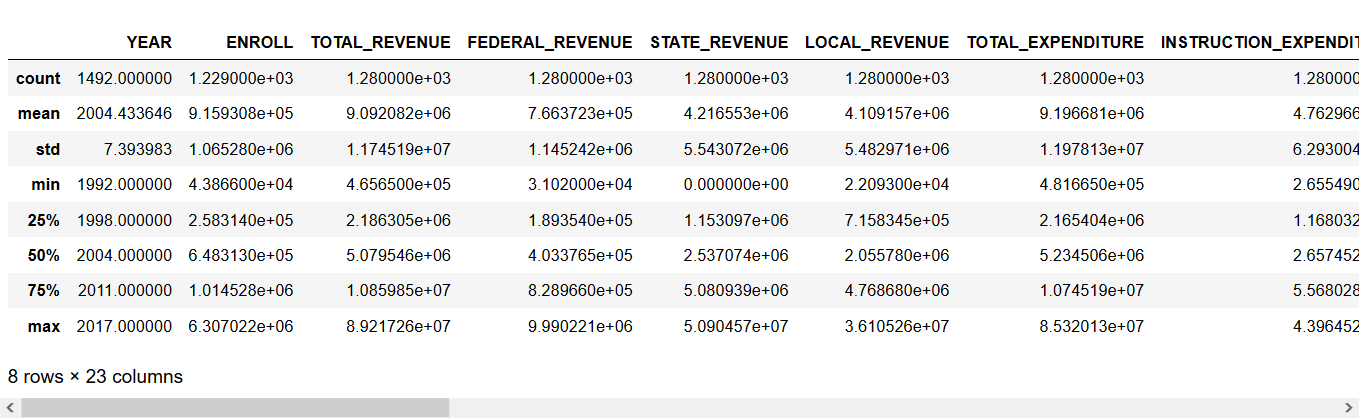

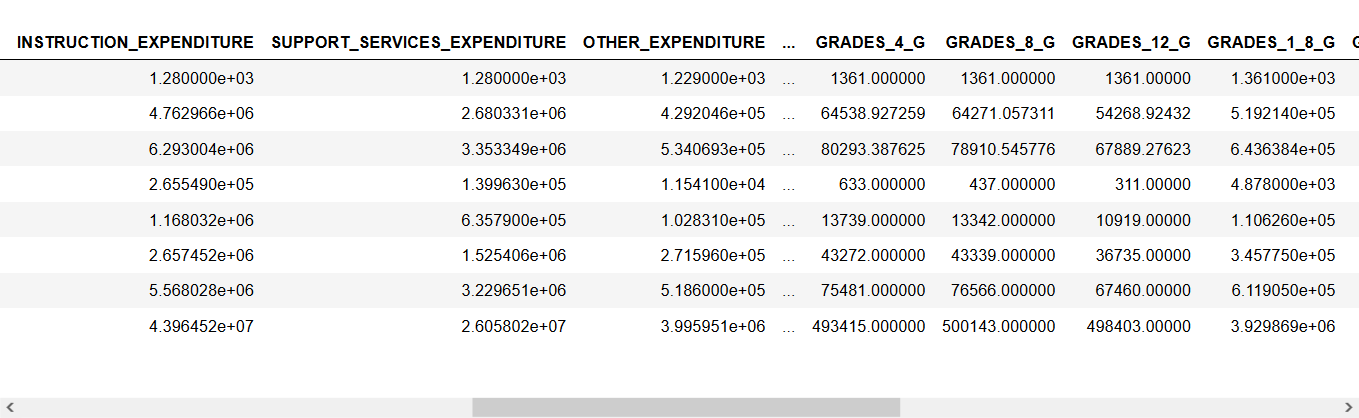

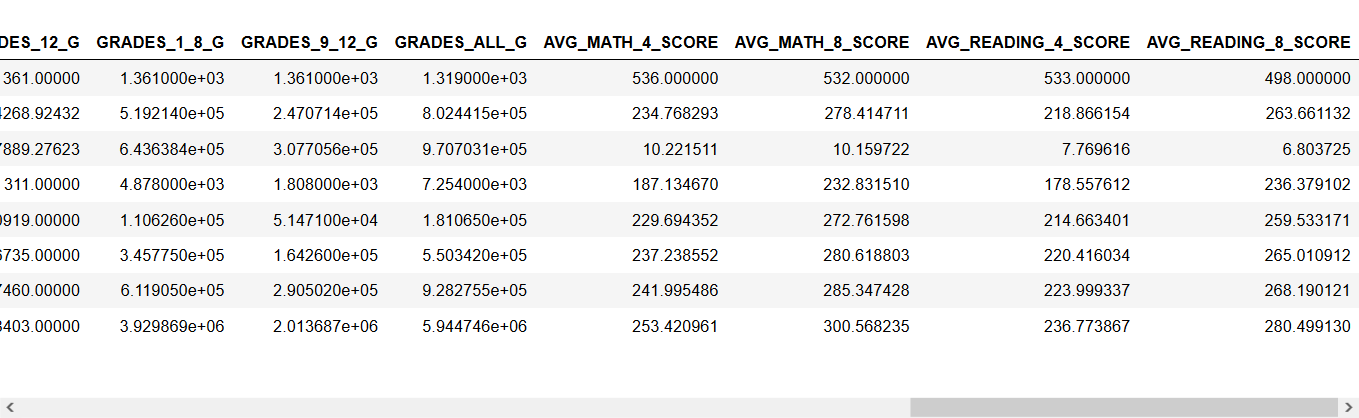

#### Summary statistics after combining multiple names for states and filling in missing values with mean/state for each column

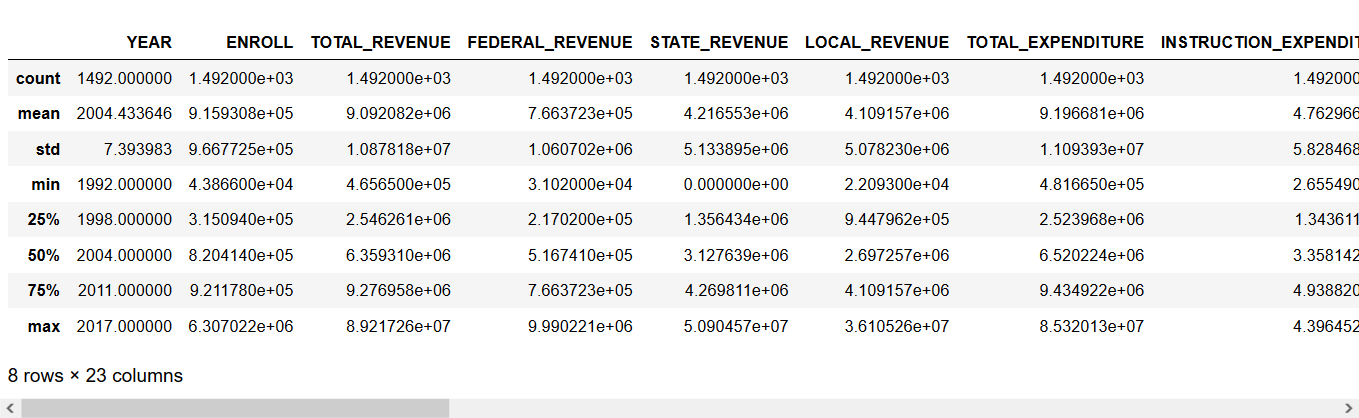

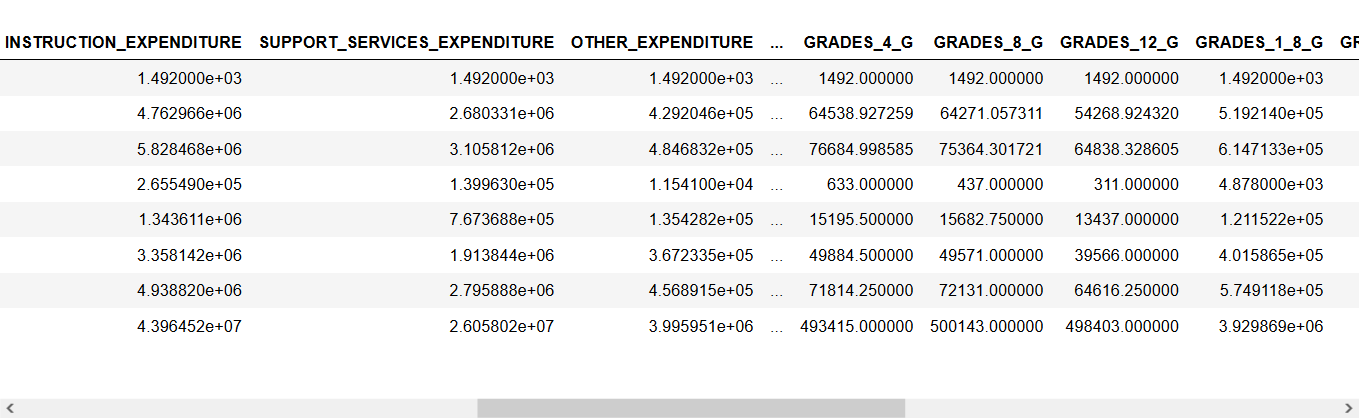

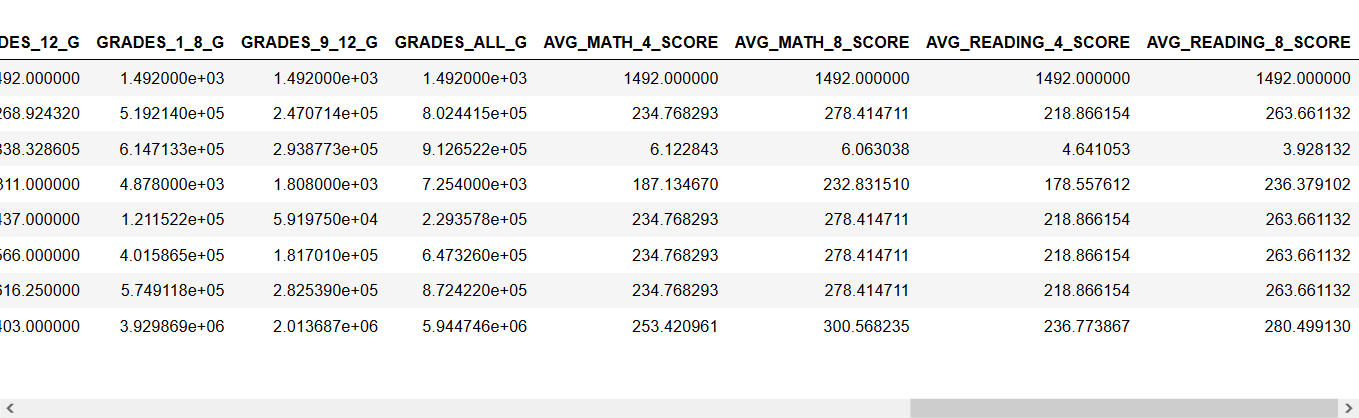

#### Summary stastics with missing values filled in by mean/year

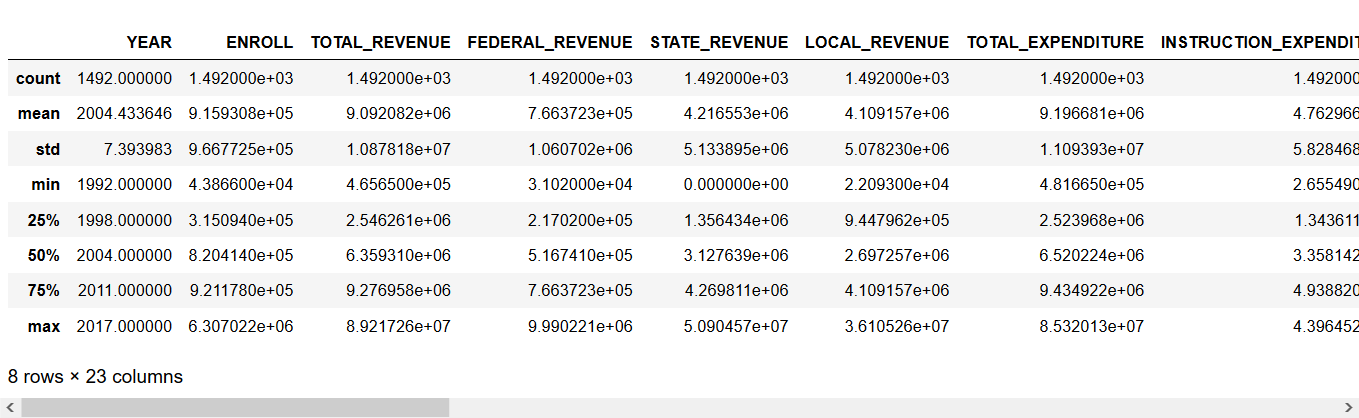

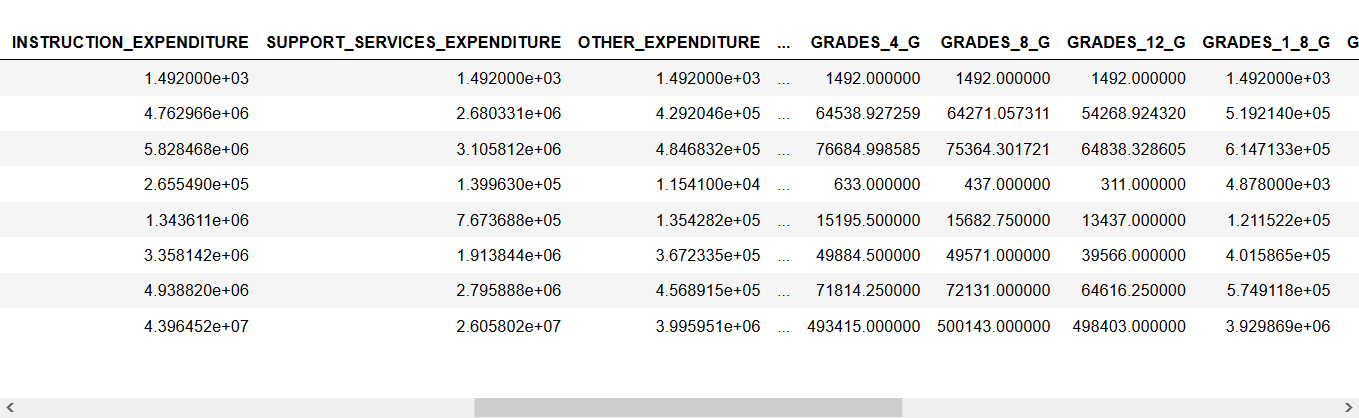

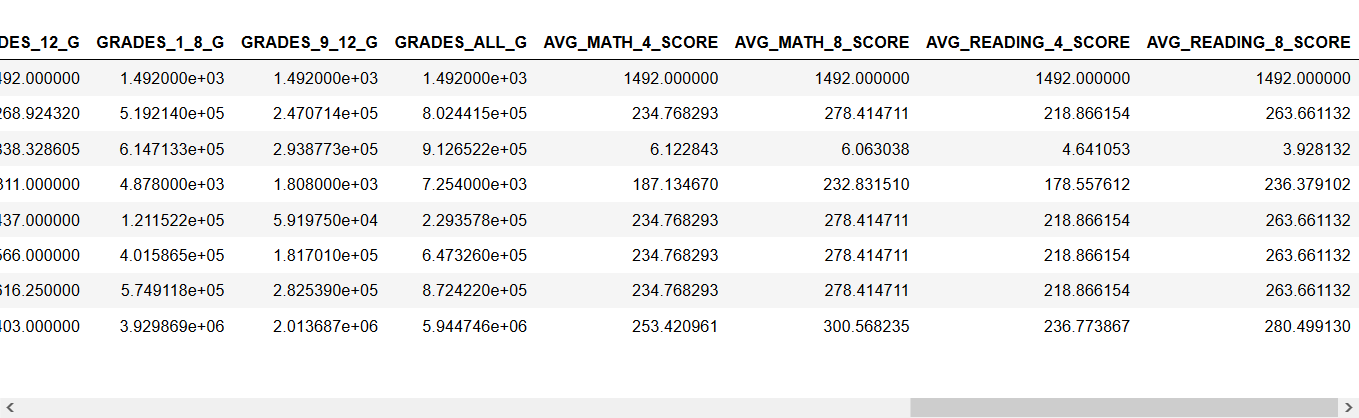

#### Summar stastics using interpolation (extrapolation)

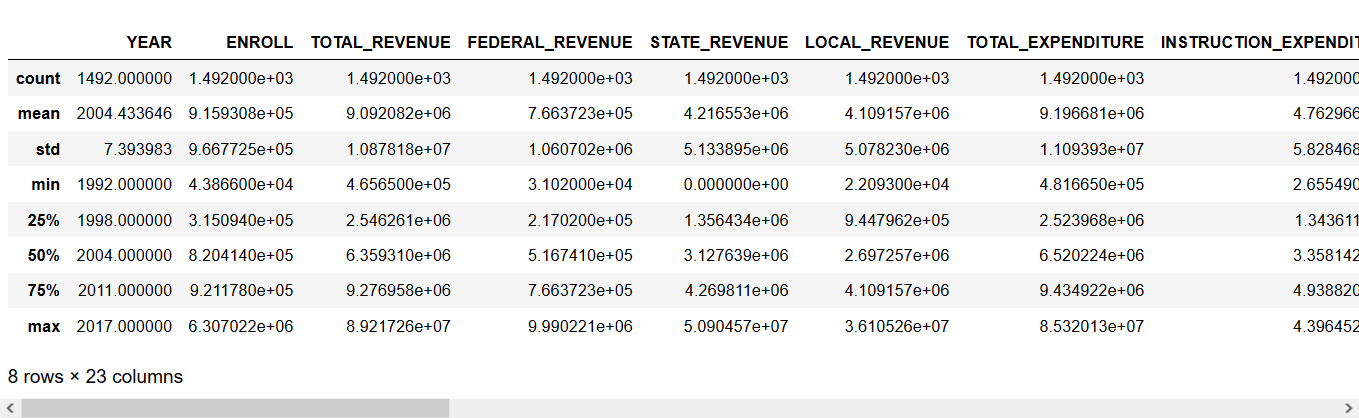

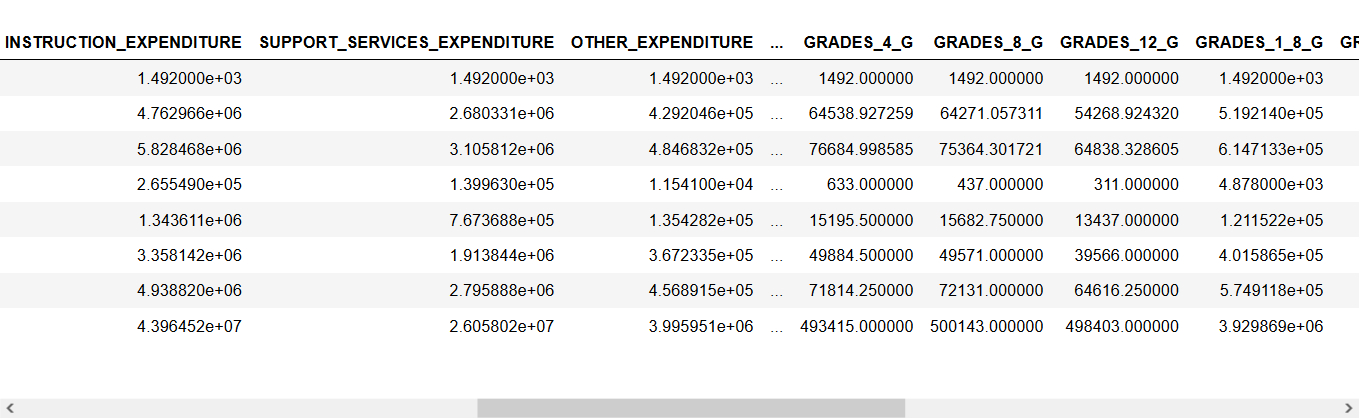

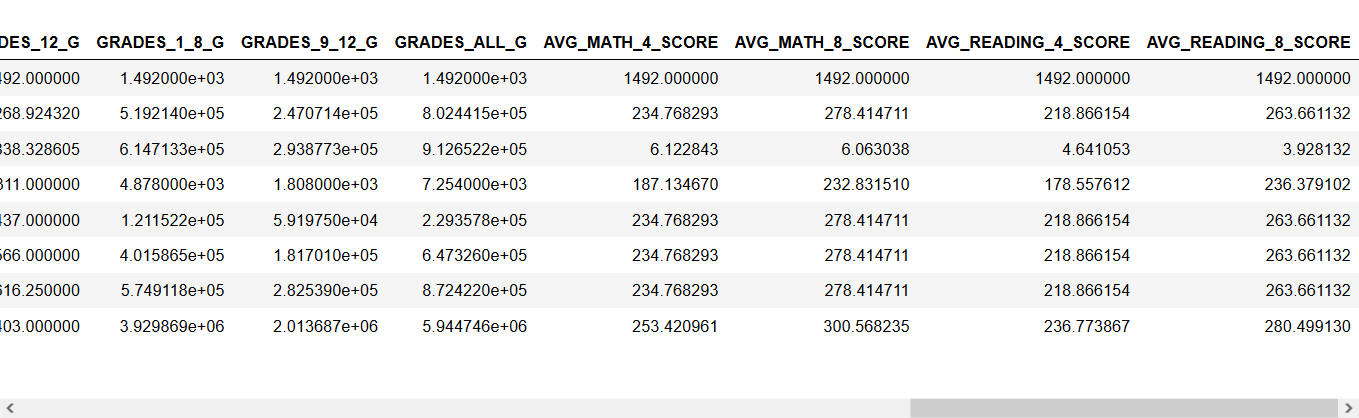

##### Compare only mean & STD for each

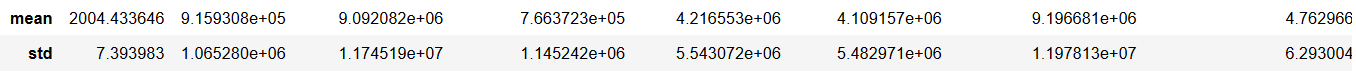

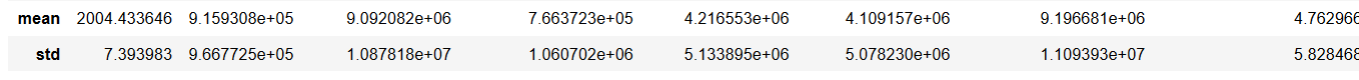

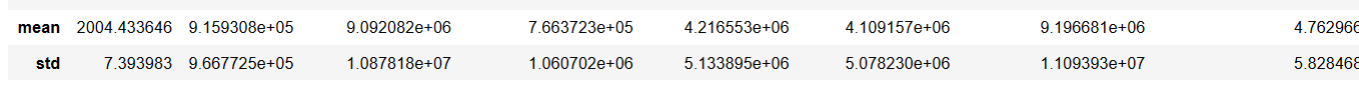

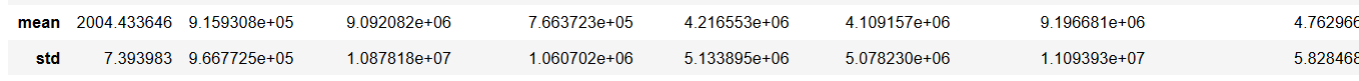

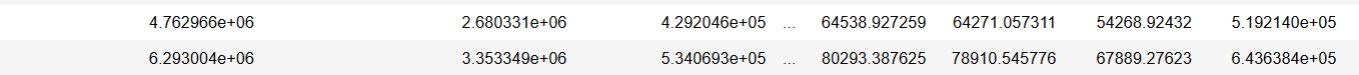

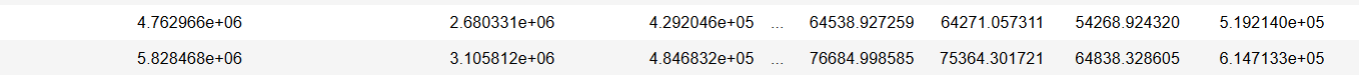

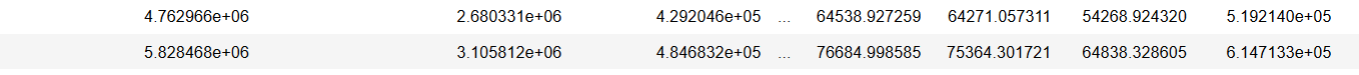

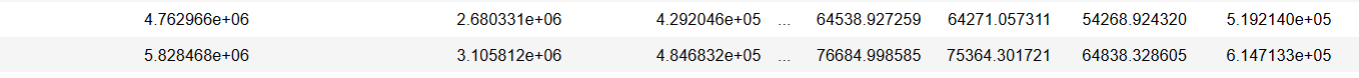

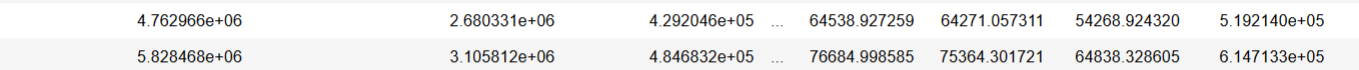

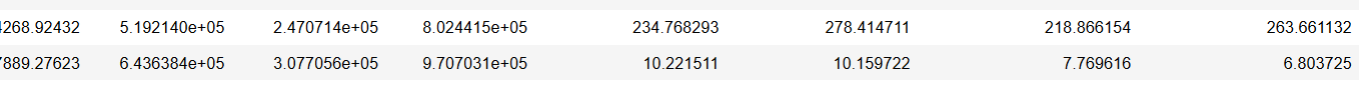

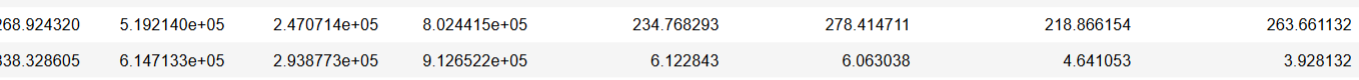

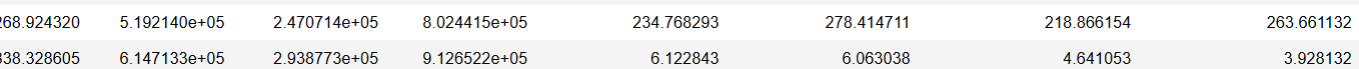

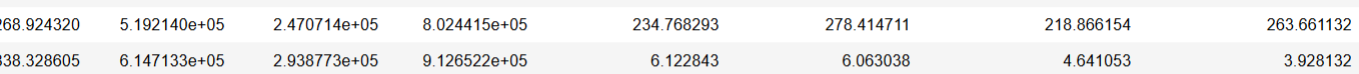

In [30]:
engine.dispose()